# Climate Indicators for Europe

Dieses Datenset enthält Klimadaten, die aus Reanalyse- und Modellsimulationen stammen und im Copernicus Climate Data Store (CDS) verfügbar sind. Es bietet Klimaindizes, die die Auswirkungen von Klimavariabilität und -wandel auf Sektoren wie Gesundheit, Landwirtschaft, Energie und Wasserwirtschaft beschreiben. Diese Indizes sind wichtig für die Anpassungsplanung auf europäischer und nationaler Ebene und wurden von der Europäischen Umweltagentur (EEA) entwickelt, um die Bedürfnisse nationaler Klimaanpassungsinitiativen in der EU zu erfüllen.

Die Indizes basieren auf Daten aus verschiedenen CDS-Datensätzen und umfassen Temperatur-, Niederschlags- und Windindikatoren. Sie wurden aus den Datensätzen „Climate and energy indicators for Europe from 2005 to 2100“ und „ERA5 hourly data on single levels from 1940 to present“ berechnet. Weitere Indizes stammen aus thematischen Projekten des CDS.



**Informationen zum Datensatz:**
* Source: [Climate Indicators](https://cds.climate.copernicus.eu/datasets/sis-ecde-climate-indicators?tab=download)
* Author: T. Tewes (City of Konstanz)
* Notebook Version: 1.2 (Updated: December 13, 2024)

> Zitieren: Copernicus Climate Change Service (C3S), Climate Data Store (CDS), (2024): Climate indicators for Europe from 1940 to 2100 derived from reanalysis and climate projections, Copernicus Climate Change Service (C3S) Climate Data Store (CDS). (Accessed on DD-MMM-YYYY)

## 1. Specifying the paths and working directories

In [1]:
import os

''' ---- Hier die Verzeichnisse angeben ---- '''
download_folder = r".\data\climate-indicators\download"
working_folder = r".\data\climate-indicators\working"
geotiff_folder = r".\data\climate-indicators\geotiff"
csv_folder = r".\data\climate-indicators\csv"
output_folder = r".\data\climate-indicators\output"
''' ----- Ende der Eingaben ---- '''

os.makedirs(download_folder, exist_ok=True)
os.makedirs(working_folder, exist_ok=True)
os.makedirs(geotiff_folder, exist_ok=True)
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(output_folder, exist_ok=True)

## 2. Download and Extract Dataset

### 2.1 Authentication

In [2]:
import cdsapi

def main():
    api_key = "fdae60fd-35d4-436f-825c-c63fedab94a4"
    api_url = "https://cds.climate.copernicus.eu/api"
    client = cdsapi.Client(url=api_url, key=api_key)
    return client

### 2.2 Request Definition and Download

In [3]:
# Define additional request fields to ensure the request stays within the file size limit.
# These coordinates were obtained using the BBox Extractor tool:
# https://str-ucture.github.io/bbox-extractor/

bbox_wgs84_deutschland = [56.0, 5.8, 47.2, 15.0]
bbox_wgs84_konstanz = [47.9, 8.9, 47.6, 9.3]

# Alternatively, use a shapefile for precise geographic filtering
import geopandas as gpd
import math

# Example: Load shapefile of Konstanz (WGS84 projection)
de_shapefile = r"./shapefiles/de_boundary.shp"
de_gdf = gpd.read_file(de_shapefile)
de_bounds = de_gdf.total_bounds

# Adjust and buffer
de_bounds_adjusted = [(math.floor(de_bounds[0]* 10)/10)-0.1,
                      (math.floor(de_bounds[1]* 10)/10)-0.1,
                      (math.ceil(de_bounds[2]* 10)/10)+0.1,
                      (math.ceil(de_bounds[3]* 10)/10)+0.1]

bbox_de_bounds_adjusted = [de_bounds_adjusted[3], de_bounds_adjusted[0],
                           de_bounds_adjusted[1], de_bounds_adjusted[2]]

bbox_de_bounds_adjusted

[55.2, 5.7, 47.1, 15.2]

### 2.3 Define request for only heat and cold

In [4]:
# # Origin = reanalysis
# dataset = "sis-ecde-climate-indicators"
# request = {
#     "variable": [
#         "mean_temperature",
#         "growing_degree_days",
#         "heating_degree_days",
#         "cooling_degree_days",
#         "tropical_nights",
#         "hot_days",
#         "warmest_three_day_period",
#         "heatwave_days",
#         "high_utci_days",
#         "frost_days",
#         "daily_maximum_temperature",
#         "daily_minimum_temperature"
#     ],
#     "origin": "reanalysis",
#     "temporal_aggregation": ["yearly"],
#     "spatial_aggregation": "gridded",
#     "other_parameters": [
#         "30_c",
#         "35_c",
#         "40_c",
#         "max",
#         "mean",
#         "min"
#     ],
#     "area": bbox_de_bounds_adjusted
# }

In [5]:
# # Origin = projections
# dataset = "sis-ecde-climate-indicators"
# request = {
#     "variable": [
#         "mean_temperature",
#         "growing_degree_days",
#         "heating_degree_days",
#         "cooling_degree_days",
#         "tropical_nights",
#         "hot_days",
#         "warmest_three_day_period",
#         "heatwave_days",
#         "frost_days",
#         "daily_maximum_temperature",
#         "daily_minimum_temperature"
#     ],
#     "origin": "projections",
#     "gcm": ["mpi_esm_lr"],
#     "rcm": ["cclm4_8_17"],
#     "experiment": [
#         "rcp4_5",
#         "rcp8_5"
#     ],
#     "ensemble_member": ["r1i1p1"],
#     "temporal_aggregation": ["yearly"],
#     "spatial_aggregation": "gridded",
#     "other_parameters": [
#         "30_c",
#         "35_c",
#         "40_c",
#         "max",
#         "mean",
#         "min"
#     ],
#     "area": bbox_de_bounds_adjusted
# }

In [6]:
# variable_group = 'heat_and_cold'
# # Uncomment and run this cell to download the dataset:

# def main_retrieve():
#     dataset_filename = f"{dataset}_{variable_group}_{request['origin']}_{request['temporal_aggregation'][0]}.zip"
#     dataset_filepath = os.path.join(download_folder, dataset_filename)

#     # Download the dataset only if the dataset has not been downloaded before
#     if not os.path.isfile(dataset_filepath):
#         # Download the dataset with the defined request parameters
#         client.retrieve(dataset, request, dataset_filepath)
#     else:
#         print("Dataset already downloaded.")

# if __name__ == "__main__":
#     client = main()
#     main_retrieve()

### 2.4 Request defined by Tim

In [7]:
dataset = "sis-ecde-climate-indicators"
request = {
    "variable": [
        "growing_degree_days",
        "heating_degree_days",
        "cooling_degree_days",
        "tropical_nights",
        "hot_days",
        "warmest_three_day_period",
        "heatwave_days",
        "high_utci_days",
        "frost_days",
        "total_precipitation",
        "maximum_consecutive_five_day_precipitation",
        "extreme_precipitation_total",
        "frequency_of_extreme_precipitation",
        "consecutive_dry_days",
        "duration_of_meteorological_droughts",
        "magnitude_of_meteorological_droughts",
        "days_with_high_fire_danger",
        "extreme_wind_speed_days",
        "fire_weather_index"
    ],
    "origin": "reanalysis",
    "temporal_aggregation": ["yearly"],
    "spatial_aggregation": "gridded",
    "other_parameters": [
        "30_c",
        "35_c",
        "40_c"
    ],
    "area": bbox_de_bounds_adjusted
}

In [8]:
dataset = "sis-ecde-climate-indicators"
request = {
    "variable": [
        "growing_degree_days",
        "heating_degree_days",
        "cooling_degree_days",
        "tropical_nights",
        "hot_days",
        "warmest_three_day_period",
        "heatwave_days",
        "frost_days",
        "total_precipitation",
        "maximum_consecutive_five_day_precipitation",
        "extreme_precipitation_total",
        "frequency_of_extreme_precipitation",
        "consecutive_dry_days",
        "duration_of_meteorological_droughts",
        "magnitude_of_meteorological_droughts",
        "days_with_high_fire_danger",
        "extreme_wind_speed_days",
        "fire_weather_index"
    ],
    "origin": "projections",
    "gcm": ["mpi_esm_lr"],
    "rcm": ["cclm4_8_17"],
    "experiment": [
        "rcp4_5",
        "rcp8_5"
    ],
    "ensemble_member": ["r1i1p1"],
    "temporal_aggregation": ["yearly"],
    "spatial_aggregation": "gridded",
    "other_parameters": [
        "30_c",
        "35_c",
        "40_c"
    ],
    "area": bbox_de_bounds_adjusted
}

In [9]:
# Run this cell to download the dataset:

def main_retrieve():
    dataset_filename = f"{dataset}_{request['origin']}_{request['temporal_aggregation'][0]}.zip"
    dataset_filepath = os.path.join(download_folder, dataset_filename)

    # Download the dataset only if the dataset has not been downloaded before
    if not os.path.isfile(dataset_filepath):
        # Download the dataset with the defined request parameters
        client.retrieve(dataset, request, dataset_filepath)
    else:
        print("Dataset already downloaded.")

if __name__ == "__main__":
    client = main()
    main_retrieve()

2025-02-18 10:42:29,353 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


2025-02-18 10:42:29,355 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.


Dataset already downloaded.


### 2.3 Extract the Zip folder

In [10]:
import zipfile

dataset_filename = f"{dataset}_{request['origin']}_{request['temporal_aggregation'][0]}.zip"
dataset_filepath = os.path.join(download_folder, dataset_filename)

extract_folder = os.path.join(working_folder, f"{request['origin']}_{request['temporal_aggregation'][0]}")
# Extract the zip file
try:
    os.makedirs(extract_folder, exist_ok=True)
    
    if not os.listdir(extract_folder):
        with zipfile.ZipFile(dataset_filepath, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"Successfully extracted files to: {extract_folder}")
    else:
        print("Folder is not empty. Skipping extraction.")
except FileNotFoundError:
    print(f"Error: The file {dataset_filepath} was not found.")
except zipfile.BadZipFile:
    print(f"Error: The file {dataset_filepath} is not a valid zip file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Folder is not empty. Skipping extraction.


## 3. Read the netCDF file and print the metadata

Note: select the origin here

In [11]:
origin = "projections" # projections or reanalysis
extract_folder = os.path.join(working_folder, f"{origin}_{request['temporal_aggregation'][0]}")

In [12]:
import re
import pandas as pd
import netCDF4 as nc

def meta(filename):
    match = re.search(r"(?P<index>\w+?)_(?P<ds_variable>[a-zA-Z_]+?)-(?P<ds_origin>\w+?)-(?P<ds_temporal_aggregation>\w+)(?:-(?P<ds_stat>min|max|mean))?(?:-(?P<ds_grid>\d+deg))?(?:-(?P<ds_rcp>rcp_\d+_\d+))?",filename)

    if not match:
        match = re.search(r"(?P<index>\w+?)_(?P<ds_variable>[a-zA-Z_]+?)-(?P<ds_origin>\w+?)-(?P<ds_temporal_aggregation>\w+)(?:-(?P<ds_stat>min|max|mean))?(?:-(?P<ds_grid>\d+deg))?(?:-(?P<ds_rcp>rcp_\d+_\d+))?",filename)

    def get_nc_variable():
        with nc.Dataset(os.path.join(extract_folder, filename), 'r') as nc_dataset:
            nc_variable_name = nc_dataset.variables.keys()
            return [*nc_variable_name][0]

    return dict(
        filename=filename,
        path=os.path.join(extract_folder, filename),
        # index=match.group('index'),
        ds_variable=match.group('ds_variable'),
        ds_origin=match.group('ds_origin'),
        ds_temporal_aggregation=match.group('ds_temporal_aggregation'),
        # ds_stat=match.group('ds_stat'),
        variable_name=get_nc_variable(),
        ds_grid=match.group('ds_grid'),
        ds_rcp=match.group('ds_rcp')
    )

# Create DataFrame from the list of files inside the extracted directory
nc_files = [meta(f) for f in os.listdir(extract_folder) if f.endswith('.nc')]
df_nc_files = pd.DataFrame.from_dict(nc_files)

# Modify pandas display options
pd.options.display.max_colwidth = 24

# Display the DataFrame
df_nc_files.head().loc[:, df_nc_files.columns != 'path']

,filename,ds_variable,ds_origin,ds_temporal_aggregation,variable_name,ds_grid,ds_rcp
0,02_growing_degree_da...,growing_degree_days,projections,yearly,tasAdjust,None,rcp_4_5
1,02_growing_degree_da...,growing_degree_days,projections,yearly,tasAdjust,None,rcp_8_5
2,03_heating_degree_da...,heating_degree_days,projections,yearly,data,None,rcp_4_5
3,03_heating_degree_da...,heating_degree_days,projections,yearly,data,None,rcp_8_5
4,04_cooling_degree_da...,cooling_degree_days,projections,yearly,data,None,rcp_4_5


### 3.1 Print unique Variable name(s) and Available Variables

In [13]:
import netCDF4 as nc

seen_variables = set()
for i, nc_file in enumerate(nc_files):
    variable_name = nc_file['variable_name']
    
    if variable_name in seen_variables:
        continue

    # Open the NetCDF file in read mode
    nc_dataset = nc.Dataset(nc_file['path'], mode='r')

    # List all variables in the dataset
    variables_list = nc_dataset.variables.keys()
    print(f"{i+1:<2} {variable_name:<18}: Available variables: {list(variables_list)}")
    
    # Add the variable name to the seen set
    seen_variables.add(variable_name)

1  tasAdjust         : Available variables: ['tasAdjust', 'time', 'lat', 'lon', 'height']
3  data              : Available variables: ['data', 'time', 'lat', 'lon', 'height']
7  tasAdjust_NON_CDM : Available variables: ['tasAdjust_NON_CDM', 'time', 'lat', 'lon', 'height']
21 prAdjust          : Available variables: ['prAdjust', 'time', 'lat', 'lon']
29 cdd               : Available variables: ['cdd', 'lat', 'lon', 'time']
31 dmd               : Available variables: ['dmd', 'lat', 'lon', 'time']


In [14]:
seen_variables = set()

for i, nc_file in enumerate(nc_files):
    variable_name = nc_file['variable_name']
    
    if variable_name in seen_variables:
        continue
    
    nc_dataset = nc.Dataset(nc_file['path'], mode='r')
    variable_data = nc_dataset[variable_name]
    
    # Generate summary of the primary variable
    summary = {
        "Variable Name": variable_name,
        "Data Type": variable_data.dtype,
        "Shape": variable_data.shape,
        "Variable Info": f"{variable_name}({', '.join(variable_data.dimensions)})",
        "Units": getattr(variable_data, "units", "N/A"),
        "Long Name": getattr(variable_data, "long_name", "N/A"),
    }
    
    # Display dataset summary as a DataFrame for better visualization
    nc_summary = pd.DataFrame(list(summary.items()), columns=['Description', 'Remarks'])

    # Display the summary DataFrame
    print(f"{i+1}. {nc_file['variable_name']}:")
    display(nc_summary)
    
    # Add the variable name to the seen set
    seen_variables.add(variable_name)

    if i >= 1:
        break

1. tasAdjust:


,Description,Remarks
0,Variable Name,tasAdjust
1,Data Type,float32
2,Shape,"(151, 32, 38)"
3,Variable Info,"tasAdjust(time, lat,..."
4,Units,1
5,Long Name,N/A


3. data:


,Description,Remarks
0,Variable Name,data
1,Data Type,float32
2,Shape,"(151, 32, 38)"
3,Variable Info,"data(time, lat, lon)"
4,Units,K
5,Long Name,N/A


## 4. Export Dataset to CSV

In [15]:
import xarray as xr

# Open the NetCDF dataset using xarray
def netcdf_to_dataframe(nc_file, bounding_box=None):
    with xr.open_dataset(nc_file['path']) as nc_dataset:
        variable_data = nc_dataset[nc_file['variable_name']]
        
        # Ensure latitude and longitude names are correct
        latitude_name = 'latitude' if 'latitude' in nc_dataset.coords else 'lat'
        longitude_name = 'longitude' if 'longitude' in nc_dataset.coords else 'lon'
        
        if bounding_box:
            # Filter the data based on latitude and longitude
            filtered_data = variable_data.where(
                (nc_dataset[latitude_name] >= bounding_box[1]) & (nc_dataset[latitude_name] <= bounding_box[3]) &
                (nc_dataset[longitude_name] >= bounding_box[0]) & (nc_dataset[longitude_name] <= bounding_box[2]),
                drop=True
            )
        else:
            filtered_data = variable_data

        # Convert the xarray dataset to a pandas DataFrame
        df = filtered_data.to_dataframe().reset_index().set_index(['time', latitude_name, longitude_name])
        
        # Rename the value column to "test value"
        # ds_origin = nc_file['ds_origin']
        # if ds_origin == "projections":
        #     df.rename(columns={nc_file['variable_name']: nc_file['ds_variable'] + ' (' + nc_file['ds_rcp'] + ')'}, inplace=True)
        # else:
        #     df.rename(columns={nc_file['variable_name']: nc_file['ds_variable']}, inplace=True)        
        return df

### 4.1 Filter by Bounding Box, Create DataFrame and Export as merged CSV file

In [16]:
# Define additional request fields to ensure the request stays within the file size limit.
# These coordinates were obtained using the BBox Extractor tool:
# https://str-ucture.github.io/bbox-extractor/

bbox_wgs84_konstanz = [47.9, 8.9, 47.6, 9.3]  # Format: [North, West, South, East]
bbox_wgs84_konstanz_standard = [9.0, 47.6, 9.3, 47.8]  # Standard format: [West, South, East, North]
bbox_wgs84_de_standard = [5.7, 47.1, 15.2, 55.2]  # Standard format: [West, South, East, North]

In [17]:
# Export all netCDF4 files to individual csv files (currently overwrites)
subset_csv_folder = os.path.join(csv_folder, f"{origin}_{request['temporal_aggregation'][0]}")
os.makedirs(subset_csv_folder, exist_ok=True)

for nc_file in nc_files:
    dataframe = netcdf_to_dataframe(nc_file=nc_file)
    dataframe.to_csv(os.path.join(subset_csv_folder, f"{nc_file['filename']}.csv"))

dataframe

KeyboardInterrupt: 

In [18]:
import ipywidgets as ipywidgets
# Extract data from netCDF4 files from specific ds_variable

ds_variable_list = df_nc_files['ds_variable'].unique()

selected_ds_variable = ipywidgets.Dropdown(
    options=ds_variable_list,
    description='Select a variable:',
    disabled=False
)
selected_ds_variable

Dropdown(description='Select a variable:', options=('growing_degree_days', 'heating_degree_days', 'cooling_deg…

In [28]:
# get data from reanalysis and projections for selected ds_variable and create a combined csv file

origin = "reanalysis"
extract_folder = os.path.join(working_folder, f"{origin}_{request['temporal_aggregation'][0]}")
nc_files_reanalysis = [meta(f) for f in os.listdir(extract_folder) if f"{selected_ds_variable.value}" in f]

origin = "projections"
extract_folder = os.path.join(working_folder, f"{origin}_{request['temporal_aggregation'][0]}")
nc_files_projections = [meta(f) for f in os.listdir(extract_folder) if f"{selected_ds_variable.value}" in f]

nc_files_merged =  nc_files_reanalysis + nc_files_projections
df_nc_files_merged = pd.DataFrame.from_dict(nc_files_merged)

df_nc_files_merged.loc[:, df_nc_files_merged.columns != 'path']

,filename,ds_variable,ds_origin,ds_temporal_aggregation,variable_name,ds_grid,ds_rcp
0,03_heating_degree_da...,heating_degree_days,reanalysis,yearly,data,None,None
1,03_heating_degree_da...,heating_degree_days,projections,yearly,data,None,rcp_4_5
2,03_heating_degree_da...,heating_degree_days,projections,yearly,data,None,rcp_8_5


In [29]:
nc_file_reanalysis = None
nc_file_proj_rcp45 = None
nc_file_proj_rcp85 = None

# Extract the nc_file_reanalysis, nc_file_proj_rcp45, nc_file_proj_rcp85 rows
for file in nc_files_merged:
    # Extract first row where ds_origin == 'reanalysis'
    if file['ds_origin'] == 'reanalysis' and nc_file_reanalysis is None:
        nc_file_reanalysis = file
    
    # Extract first row where ds_origin == 'projections' and ds_rcp == 'rcp_4_5'
    if file['ds_origin'] == 'projections' and file['ds_rcp'] == 'rcp_4_5' and nc_file_proj_rcp45 is None:
        nc_file_proj_rcp45 = file
    
    # Extract first row where ds_origin == 'projections' and ds_rcp == 'rcp_8_5'
    if file['ds_origin'] == 'projections' and file['ds_rcp'] == 'rcp_8_5' and nc_file_proj_rcp85 is None:
        nc_file_proj_rcp85 = file

### Error bar chart for reanalysis

In [30]:
# Farben
color1 = "green" #Reanalyse
color2 = "#005d82" #RCP4.5
color3 = "#ce1657" #RCP8.5

# Darstellung der Reanalyse-Daten
design_reanalyse = {
    'label': 'Reanalyse',
    'color': color1,
    'marker': 'o',
    'linestyle': '-',
    'markersize': 4,
    'linewidth': 0.5
}

# Darstellung der RCP4.5-Daten
design_rcp45 = {
    'label': 'RCP4.5',
    'color': color2,
    'marker': 'o',
    'linestyle': ':',
    'markersize': 3,
    'linewidth': 0.5
}

# Darstellung der RCP8.5-Daten
design_rcp85 = {
    'label': 'RCP8.5',
    'color': color3,
    'marker': 'o',
    'linestyle': ':',
    'markersize': 3,
    'linewidth': 0.5
}

# Darstellung der Trendlinie RCP4.5
design_rcp45_trend = {
    'label': 'Trend RCP4.5',
    'color': color2,
    'linestyle': ':',
    'linewidth': 1.5
}

# Darstellung der Trendlinie RCP8.5
design_rcp85_trend = {
    'label': 'Trend RCP8.5',
    'color': color3,
    'linestyle': ':',
    'linewidth': 1.5
}

# Darstellung der Trennline zwischen Reanalyse und Projektionsdaten
datum_trennlinie = '2024-01-01' # wenn neuere Reanalyse-Daten vorliegen, müsste dieses Datum angepasst werden
design_trennlinie = {
    'color': 'grey',
    'linestyle': '--',
    'linewidth': 2.5
}

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for reference year
start_year = 1971
end_year = 2000

# Load the nc_file_reanalysis and convert it to a DataFrame
variable_name_reanalysis = nc_file_reanalysis['variable_name']
df_reanalysis = netcdf_to_dataframe(nc_file=nc_file_reanalysis,
                                    bounding_box=bbox_wgs84_konstanz_standard).reset_index()

# Filter the DataFrame for the reference period
df_reanalysis['time'] = pd.to_datetime(df_reanalysis['time'])
df_reanalysis_ref_period = df_reanalysis[(df_reanalysis['time'].dt.year >= start_year) &
                                         (df_reanalysis['time'].dt.year <= end_year)]

# Calculate the mean value for the reference period and the anomaly
reference_mean = df_reanalysis_ref_period[variable_name_reanalysis].mean()
df_reanalysis.loc[:, 'anomaly'] = df_reanalysis[variable_name_reanalysis] - reference_mean

df_reanalysis_yearly_mean = (
    df_reanalysis
    .groupby(df_reanalysis['time'].dt.year)
    .mean()
    .drop(['lat', 'lon'], axis=1)
)

df_reanalysis_yearly_mean.head()

,time,realization,data,anomaly
time,,,,
1940,1940-01-01,0.0,3363.033203,686.089111
1941,1941-01-01,0.0,3308.758789,631.814575
1942,1942-01-01,0.0,3150.089844,473.145874
1943,1943-01-01,0.0,2718.500977,41.556763
1944,1944-01-01,0.0,3084.551758,407.607666


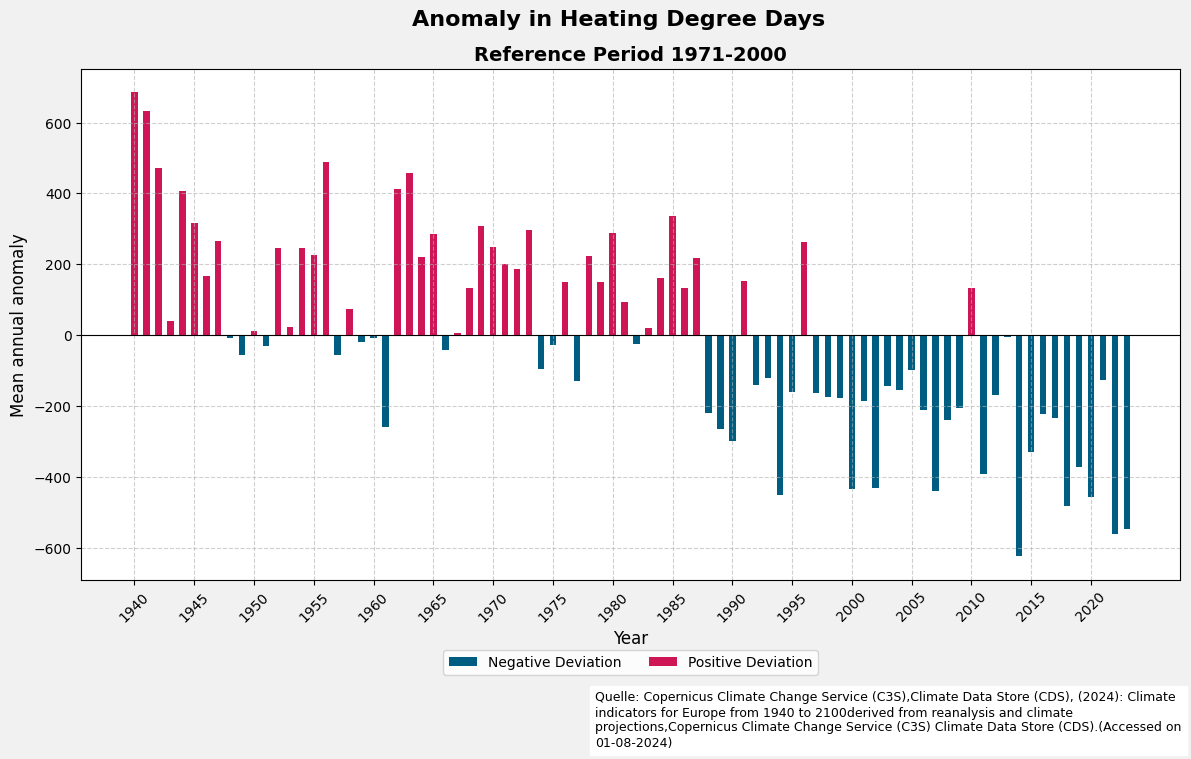

In [32]:
# Create a plot
fig, ax = plt.subplots(figsize=(12, 7), facecolor='#f1f1f1', edgecolor='k')

# Plot negative values
ax.bar(df_reanalysis_yearly_mean['time'][df_reanalysis_yearly_mean['anomaly'] < 0], 
       df_reanalysis_yearly_mean['anomaly'][df_reanalysis_yearly_mean['anomaly'] < 0], 
       width=200,
       color='#005d82',
       label='Negative Deviation')

# Plot positive values
ax.bar(df_reanalysis_yearly_mean['time'][df_reanalysis_yearly_mean['anomaly'] >= 0], 
       df_reanalysis_yearly_mean['anomaly'][df_reanalysis_yearly_mean['anomaly'] >= 0], 
       width=200,
       color='#ce1657',
       label='Positive Deviation')

# Add zero line
ax.axhline(0, color='black', linewidth=0.8)

# Set axis labels and title
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Mean annual anomaly", fontsize=12)
ax.set_title(f"Reference Period {start_year}-{end_year}", fontsize=14, fontweight='bold')
fig.suptitle(f"Anomaly in {selected_ds_variable.value.replace('_',' ').title()}",
             fontsize=16,
             fontweight='bold',
             x=0.52)

# Add grid
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)

# X-axis: Show all 5-year intervals
years = pd.date_range(start=df_reanalysis_yearly_mean['time'].min(),
                      end=df_reanalysis_yearly_mean['time'].max(),
                      freq='5YE').year
ax.set_xticks(pd.to_datetime(years, format='%Y'))
ax.set_xticklabels(years, rotation=45)

# Add description
plt.figtext(
    0.5,
    -0.035,
    (
       'Quelle: Copernicus Climate Change Service (C3S),'
       'Climate Data Store (CDS), (2024): Climate indicators for Europe from 1940 to 2100'
       'derived from reanalysis and climate projections,'
       'Copernicus Climate Change Service (C3S) Climate Data Store (CDS).'
       '(Accessed on 01-08-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)
# Legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

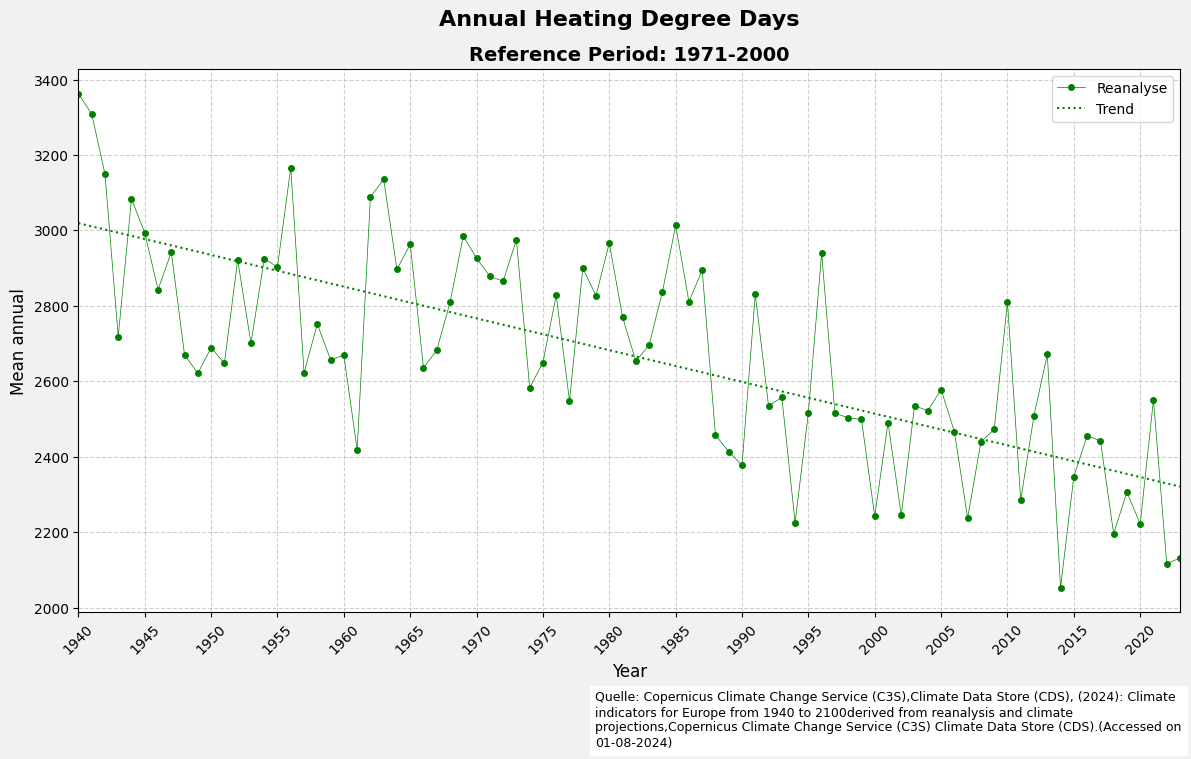

In [33]:
import numpy as np
#  Create a plot
fig, ax = plt.subplots(figsize=(12, 7), facecolor='#f1f1f1', edgecolor='k')

# Plot
plt.plot(df_reanalysis_yearly_mean['time'],
         df_reanalysis_yearly_mean[variable_name_reanalysis],
         **design_reanalyse)

# Plot the trend line
z = np.polyfit(df_reanalysis_yearly_mean['time'].dt.year,
               df_reanalysis_yearly_mean[variable_name_reanalysis], 1)
p = np.poly1d(z)
ax.plot(df_reanalysis_yearly_mean['time'],
        p(df_reanalysis_yearly_mean['time'].dt.year),
        label='Trend',
        color=color1,
        linestyle=":",
        linewidth=1.5)

# Set axis labels and title
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Mean annual", fontsize=12)
ax.set_title(f"Reference Period: {start_year}-{end_year}",
             fontsize=14,
             fontweight='bold')
fig.suptitle(f"Annual {selected_ds_variable.value.replace('_',' ').title()}",
             fontsize=16,
             fontweight='bold',
             x=0.52)

plt.xlim(df_reanalysis_yearly_mean['time'].min(), df_reanalysis_yearly_mean['time'].max())

# Add grid
ax.grid(visible=True,
        color='#b0b0b0',
        linestyle='--',
        linewidth=0.8,
        alpha=0.6)

# X-axis: Show all 5-year intervals
years = pd.date_range(start=df_reanalysis_yearly_mean['time'].min(),
                      end=df_reanalysis_yearly_mean['time'].max(),
                      freq='5YE').year
ax.set_xticks(pd.to_datetime(years, format='%Y'))
ax.set_xticklabels(years, rotation=45)

# Add description
plt.figtext(
    0.5,
    -0.035,
    (
       'Quelle: Copernicus Climate Change Service (C3S),'
       'Climate Data Store (CDS), (2024): Climate indicators for Europe from 1940 to 2100'
       'derived from reanalysis and climate projections,'
       'Copernicus Climate Change Service (C3S) Climate Data Store (CDS).'
       '(Accessed on 01-08-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)
# Legend
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [34]:
# Define
start_year = 1940
intermediate_year = 2023
end_year = 2100

# Load the nc_files and convert it to a DataFrame
variable_name_reanalysis = nc_file_reanalysis['variable_name']
df_reanalysis = netcdf_to_dataframe(nc_file=nc_file_reanalysis,
                                    bounding_box=bbox_wgs84_konstanz_standard).reset_index()

variable_name_projections = nc_file_proj_rcp45['variable_name']
df_rcp45 = netcdf_to_dataframe(nc_file=nc_file_proj_rcp45,
                                           bounding_box=bbox_wgs84_konstanz_standard).reset_index()
df_rcp85 = netcdf_to_dataframe(nc_file=nc_file_proj_rcp85,
                                           bounding_box=bbox_wgs84_konstanz_standard).reset_index()

# Convert time
df_reanalysis['time'] = pd.to_datetime(df_reanalysis['time'])
df_rcp45['time'] = pd.to_datetime(df_rcp45['time'])
df_rcp85['time'] = pd.to_datetime(df_rcp85['time'])

# Filter
df_reanalysis = df_reanalysis[(df_reanalysis['time'].dt.year >= start_year) &
                              (df_reanalysis['time'].dt.year <= intermediate_year)]
df_rcp45 = df_rcp45[(df_rcp45['time'].dt.year >= intermediate_year+1) &
                    (df_rcp45['time'].dt.year <= end_year)]
df_rcp85 = df_rcp85[(df_rcp85['time'].dt.year >= intermediate_year+1) &
                    (df_rcp85['time'].dt.year <= end_year)]

df_rcp45['Year'] = df_rcp45['time'].dt.year
df_rcp85['Year'] = df_rcp85['time'].dt.year

# Function
def compute_fixed_30_year_average(df, column):
    # Ensure the data is sorted by year before performing any rolling operation
    df = df.sort_values(by='Year')
    
    # Calculate rolling 30-year average and standard deviation
    df['30_year_avg'] = df[column].rolling(window=30, min_periods=1, center=True).mean()
    df['30_year_std'] = df[column].rolling(window=30, min_periods=1, center=True).std()
    
    return df

# Execute
df_rcp45 = compute_fixed_30_year_average(df_rcp45, variable_name_projections)
df_rcp85 = compute_fixed_30_year_average(df_rcp85, variable_name_projections)

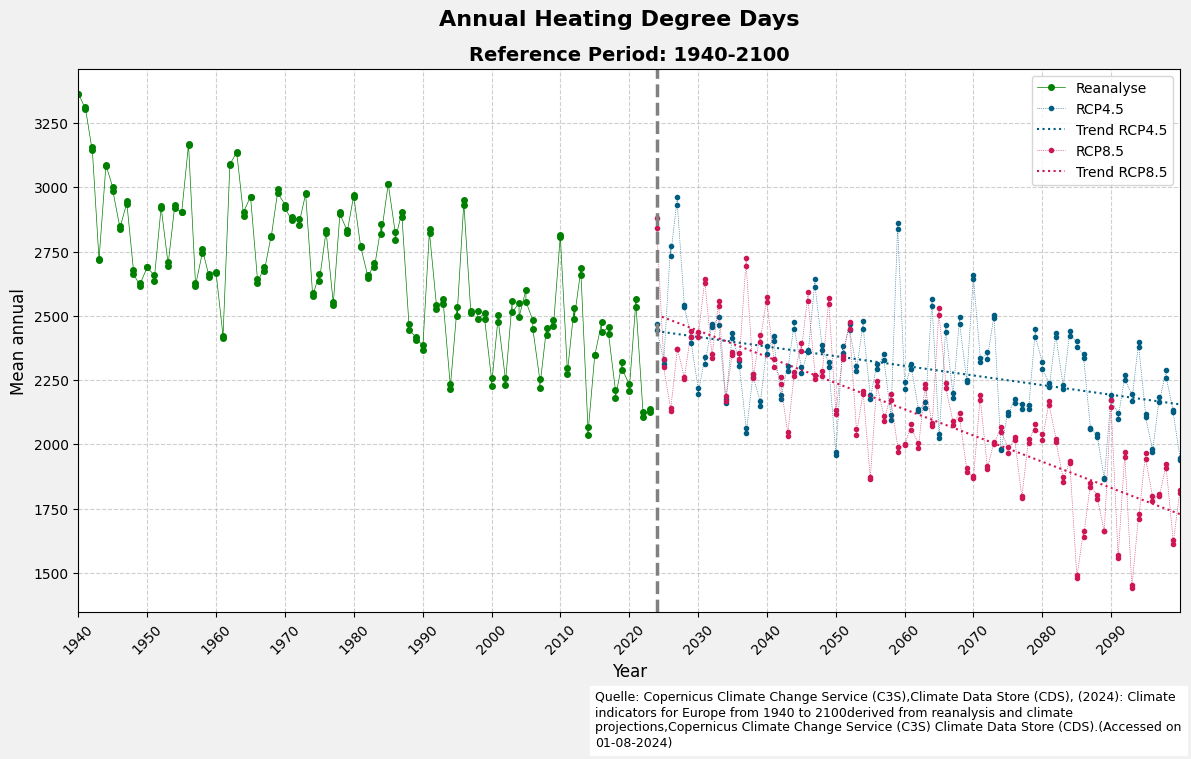

In [35]:
# Create a plot
fig, ax = plt.subplots(figsize=(12, 7), facecolor='#f1f1f1', edgecolor='k')

plt.plot(df_reanalysis['time'],
         df_reanalysis[variable_name_reanalysis],
         **design_reanalyse)

# Plot the rcp45 data and trend line
plt.plot(df_rcp45['time'],
         df_rcp45[variable_name_projections],
         **design_rcp45)
z = np.polyfit(df_rcp45['time'].dt.year,
               df_rcp45[variable_name_projections], 1)
p = np.poly1d(z)
plt.plot(df_rcp45['time'],
         p(df_rcp45['time'].dt.year),
         **design_rcp45_trend)

# Plot the rcp85 data and trend line
plt.plot(df_rcp85['time'],
         df_rcp85[variable_name_projections],
         **design_rcp85)
z = np.polyfit(df_rcp85['time'].dt.year,
               df_rcp85[variable_name_projections], 1)
p = np.poly1d(z)
plt.plot(df_rcp85['time'],
         p(df_rcp85['time'].dt.year),
         **design_rcp85_trend)

# Plot vertical line
plt.axvline(x=pd.Timestamp('2024-01-01'), **design_trennlinie)

# Set axis labels and title
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Mean annual", fontsize=12)
ax.set_title(f"Reference Period: {start_year}-{end_year}",
             fontsize=14,
             fontweight='bold')
fig.suptitle(f"Annual {selected_ds_variable.value.replace('_',' ').title()}",
             fontsize=16,
             fontweight='bold',
             x=0.52)

plt.xlim(df_reanalysis['time'].min(), df_rcp45['time'].max())

# Add grid
ax.grid(visible=True,
        color='#b0b0b0',
        linestyle='--',
        linewidth=0.8,
        alpha=0.6)

# X-axis: Show all 5-year intervals
years = pd.date_range(start=df_reanalysis['time'].min(),
                      end=df_rcp45['time'].max(),
                      freq='10YE').year
ax.set_xticks(pd.to_datetime(years, format='%Y'))
ax.set_xticklabels(years, rotation=45)

# Add description
plt.figtext(
    0.5,
    -0.035,
    (
       'Quelle: Copernicus Climate Change Service (C3S),'
       'Climate Data Store (CDS), (2024): Climate indicators for Europe from 1940 to 2100'
       'derived from reanalysis and climate projections,'
       'Copernicus Climate Change Service (C3S) Climate Data Store (CDS).'
       '(Accessed on 01-08-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)
# Legend
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


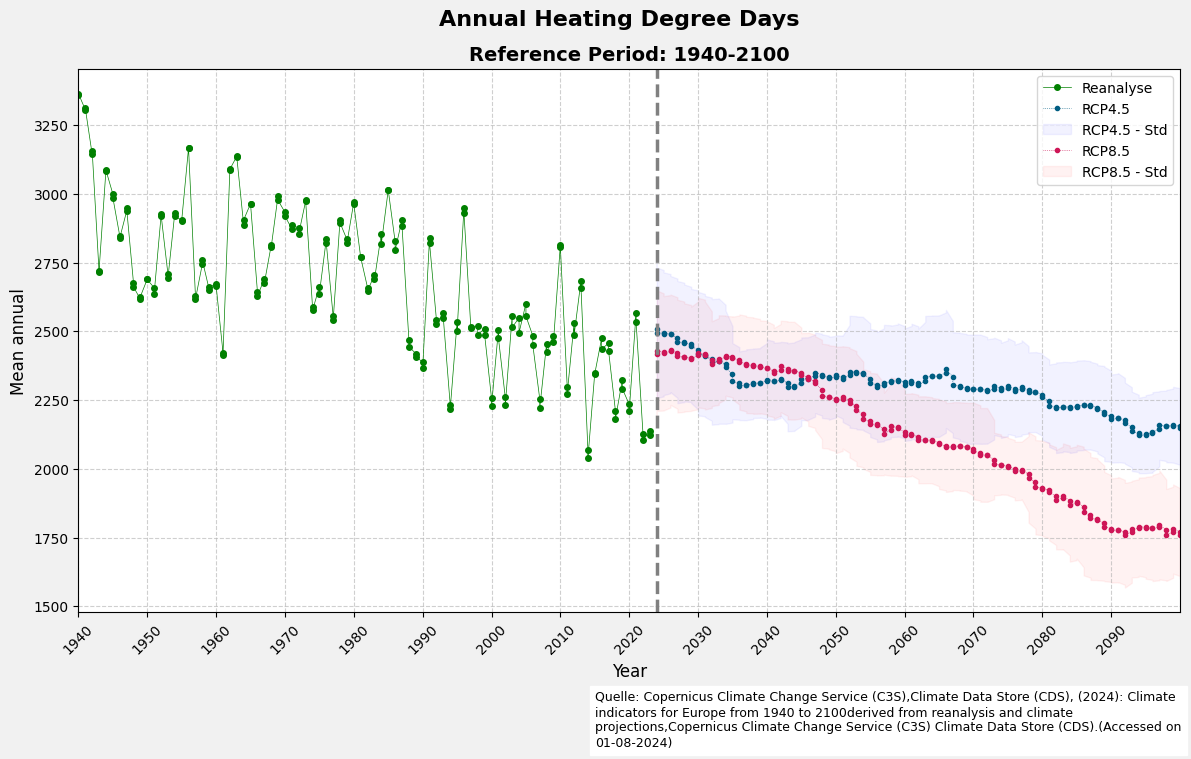

In [36]:
# Create a plot
fig, ax = plt.subplots(figsize=(12, 7), facecolor='#f1f1f1', edgecolor='k')

plt.plot(df_reanalysis['time'],
         df_reanalysis[variable_name_reanalysis],
         **design_reanalyse)

plt.plot(df_rcp45['time'], df_rcp45['30_year_avg'], **design_rcp45)
plt.fill_between(df_rcp45['time'], 
                 df_rcp45['30_year_avg'] - df_rcp45['30_year_std'], 
                 df_rcp45['30_year_avg'] + df_rcp45['30_year_std'], 
                 color='blue', alpha=0.05, label='RCP4.5 - Std')

plt.plot(df_rcp85['time'], df_rcp85['30_year_avg'], **design_rcp85)
plt.fill_between(df_rcp85['time'], 
                 df_rcp85['30_year_avg'] - df_rcp85['30_year_std'], 
                 df_rcp85['30_year_avg'] + df_rcp85['30_year_std'], 
                 color='red', alpha=0.05, label='RCP8.5 - Std')

# Plot vertical line
plt.axvline(x=pd.Timestamp('2024-01-01'), **design_trennlinie)

# Set axis labels and title
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Mean annual", fontsize=12)
ax.set_title(f"Reference Period: {start_year}-{end_year}",
             fontsize=14,
             fontweight='bold')
fig.suptitle(f"Annual {selected_ds_variable.value.replace('_',' ').title()}",
             fontsize=16,
             fontweight='bold',
             x=0.52)

plt.xlim(df_reanalysis['time'].min(), df_rcp45['time'].max())

# Add grid
ax.grid(visible=True,
        color='#b0b0b0',
        linestyle='--',
        linewidth=0.8,
        alpha=0.6)

# X-axis: Show all 5-year intervals
years = pd.date_range(start=df_reanalysis['time'].min(),
                      end=df_rcp45['time'].max(),
                      freq='10YE').year
ax.set_xticks(pd.to_datetime(years, format='%Y'))
ax.set_xticklabels(years, rotation=45)

# Add description
plt.figtext(
    0.5,
    -0.035,
    (
       'Quelle: Copernicus Climate Change Service (C3S),'
       'Climate Data Store (CDS), (2024): Climate indicators for Europe from 1940 to 2100'
       'derived from reanalysis and climate projections,'
       'Copernicus Climate Change Service (C3S) Climate Data Store (CDS).'
       '(Accessed on 01-08-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)
# Legend
ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
